In [1]:
import pandas as pd
df=pd.read_csv('Drug.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df.isna().sum()

,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug,0


In [4]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
195,False
196,False
197,False
198,False


In [5]:
df[df.duplicated()]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


Sex
M    104
F     96
Name: count, dtype: int64


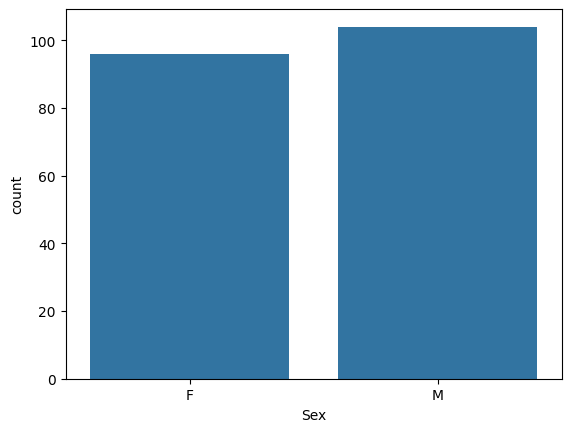

In [7]:
x= df.Sex.value_counts()
print(x)
p=sns.countplot(data=df,x="Sex")
plt.show()

Sex
M    104
F     96
Name: count, dtype: int64


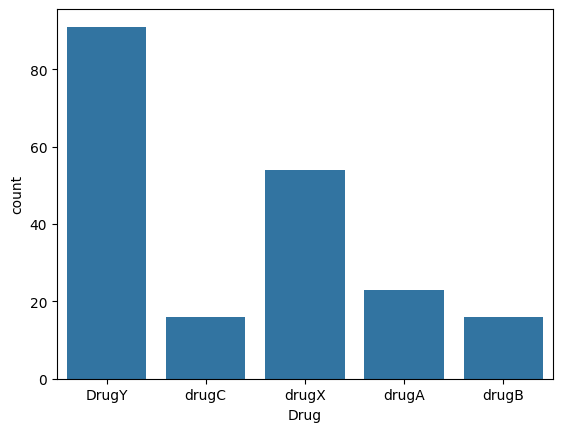

In [8]:
x= df.Sex.value_counts()
print(x)
p=sns.countplot(data=df,x="Drug")
plt.show()

In [9]:
df['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

<ipython-input-10-b992a63fcb87>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Drug']=='DrugY']['Age'],color='green')
<ipython-input-10-b992a63fcb87>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Drug']=='DrugX']['Age'],color='red')
/usr/local/lib/python3.10/dist-packages/nump

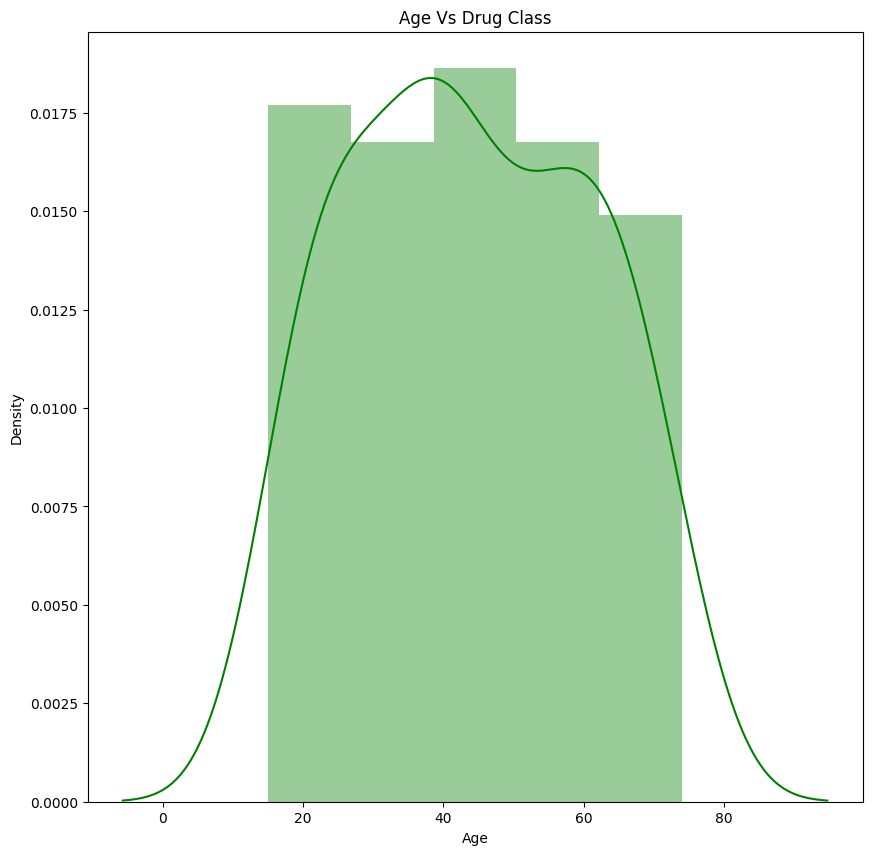

In [10]:
plt.figure(figsize=(10,10))
sns.distplot(df[df['Drug']=='DrugY']['Age'],color='green')
sns.distplot(df[df['Drug']=='DrugX']['Age'],color='red')
sns.distplot(df[df['Drug']=='DrugA']['Age'],color='black')
sns.distplot(df[df['Drug']=='DrugB']['Age'],color='orange')
sns.distplot(df[df['Drug']=='DrugC']['Age'],color='blue')
plt.title("Age Vs Drug Class")
plt.show()

In [11]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df['BP']=oe.fit_transform(df[['BP']])
df['Sex']=oe.fit_transform(df[['Sex']])
df['Cholesterol']=oe.fit_transform(df[['Cholesterol']])
df['Drug']=oe.fit_transform(df[['Drug']])

In [12]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0.0,0.0,0.0,25.355,0.0
1,47,1.0,1.0,0.0,13.093,3.0
2,47,1.0,1.0,0.0,10.114,3.0
3,28,0.0,2.0,0.0,7.798,4.0
4,61,0.0,1.0,0.0,18.043,0.0
...,...,...,...,...,...,...
195,56,0.0,1.0,0.0,11.567,3.0
196,16,1.0,1.0,0.0,12.006,3.0
197,52,1.0,2.0,0.0,9.894,4.0
198,23,1.0,2.0,1.0,14.020,4.0


In [13]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [14]:
X

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0.0,0.0,0.0,25.355
1,47,1.0,1.0,0.0,13.093
2,47,1.0,1.0,0.0,10.114
3,28,0.0,2.0,0.0,7.798
4,61,0.0,1.0,0.0,18.043
...,...,...,...,...,...
195,56,0.0,1.0,0.0,11.567
196,16,1.0,1.0,0.0,12.006
197,52,1.0,2.0,0.0,9.894
198,23,1.0,2.0,1.0,14.020


In [15]:
y

,Drug
0,0.0
1,3.0
2,3.0
3,4.0
4,0.0
...,...
195,3.0
196,3.0
197,4.0
198,4.0


In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
from sklearn.tree import DecisionTreeClassifier
clf_gini=DecisionTreeClassifier(criterion='gini',random_state=0)
clf_gini.fit(X_train,Y_train)
y_pred_gini=clf_gini.predict(X_test)

In [18]:
y_pred_gini

array([4., 0., 4., 3., 0., 0., 0., 4., 1., 4., 1., 4., 0., 1., 2., 0., 2.,
       4., 3., 0., 2., 4., 4., 0., 0., 0., 3., 4., 0., 4., 0., 3., 3., 0.,
       1., 0., 4., 1., 0., 1.])

In [19]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred_gini,Y_test))

1.0


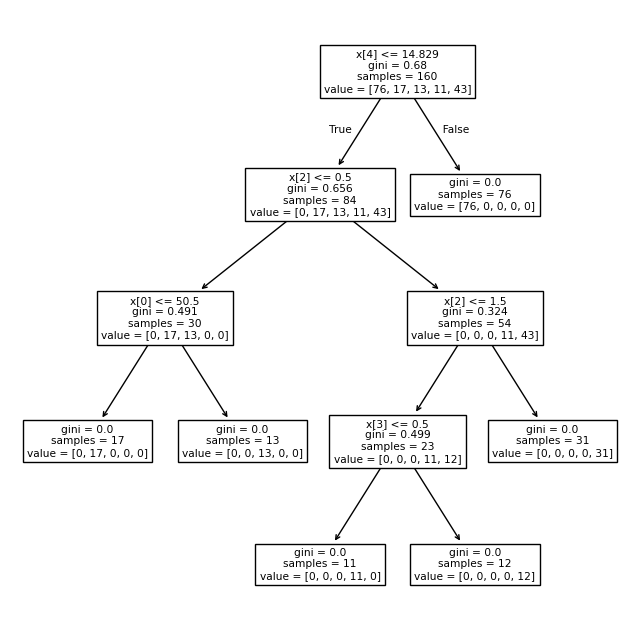

In [20]:
from sklearn import tree
plt.figure(figsize=(8,8))
tree.plot_tree(clf_gini.fit(X_train,Y_train))
plt.show()

In [21]:
clf_entropy=DecisionTreeClassifier(criterion='entropy', max_depth=3,random_state=0)
clf_entropy.fit(X_train,Y_train)
y_pred_entropy=clf_entropy.predict(X_test)

0.875


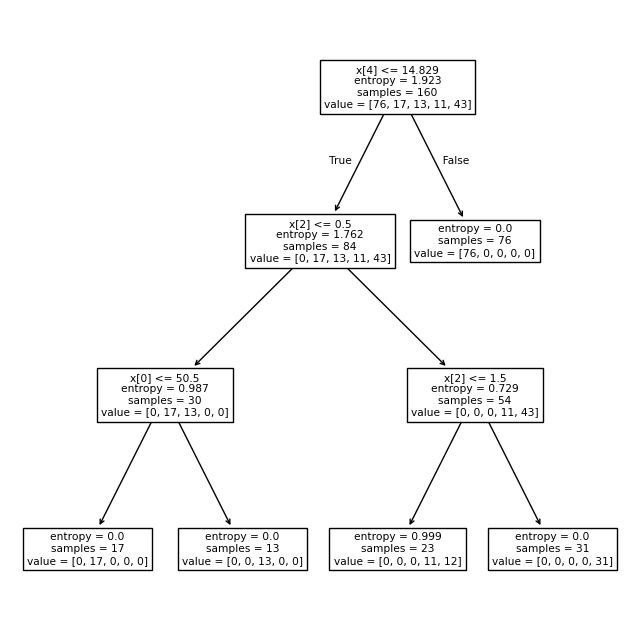

In [22]:
print(accuracy_score(Y_test,y_pred_entropy))
plt.figure(figsize=(8,8))
tree.plot_tree(clf_entropy.fit(X_train,Y_train))
plt.show()